In [1]:
import numpy as np
import pandas as pd
import mediapipe as mp
import os
import cv2


2024-10-05 08:09:34.855240: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-05 08:09:34.857813: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-05 08:09:34.867176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 08:09:34.879479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 08:09:34.882904: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 08:09:34.893254: I tensorflow/core/platform/cpu_feature_gu

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
mp_holistic = mp.solutions.holistic #Holistic model 
mp_drawing = mp.solutions.drawing_utils #drawing utiliites

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_styled_landmarks(image, results):
    
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
    #                             mp_drawing.DrawingSpec(color=(80,110,10),thickness = 1, circle_radius=1),
    #                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
    #                          )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness = 2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness = 2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,120,60),thickness = 2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(245,56,221),thickness=2,circle_radius=2))


In [5]:
def extract_keypoints(results):
    # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    pose = pose[:22]
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])


In [6]:
IMAGES_PATH  = 'Data/collectedimages'
KEYPOINTS_PATH = 'Data/colectedkeypoints'
HolisticImages_PATH = 'Data/HolisticImages'

In [7]:
if not os.path.exists(HolisticImages_PATH):
    os.makedirs(HolisticImages_PATH)
if not os.path.exists(KEYPOINTS_PATH):
    os.makedirs(KEYPOINTS_PATH)

In [8]:
label_map = os.listdir(IMAGES_PATH)

In [9]:
for label in label_map:
    if not os.path.exists(os.path.join(KEYPOINTS_PATH, label)):
        os.makedirs(os.path.join(KEYPOINTS_PATH, label))
    if not os.path.exists(os.path.join(HolisticImages_PATH, label)):
        os.makedirs(os.path.join(HolisticImages_PATH, label))
    image_dir = os.path.join(IMAGES_PATH, label)
    num_images = len(os.listdir(image_dir))
    for i, image_path in enumerate(os.listdir(image_dir)):
        image = cv2.imread(os.path.join(image_dir, image_path))
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            image, results = mediapipe_detection(image, holistic)
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(KEYPOINTS_PATH, label, image_path.replace('.jpg', ''))
            np.save(npy_path, keypoints)
            draw_styled_landmarks(image, results)
            cv2.imwrite(os.path.join(HolisticImages_PATH, label, image_path), image)

I0000 00:00:1728090576.425746   95819 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1728090576.427997   95900 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: RENOIR (renoir, LLVM 15.0.7, DRM 3.57, 6.8.0-45-generic)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1728090576.496535   95880 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1728090576.517694   95889 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1728090576.519275   95887 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1728090576.519364   95888 inference_feedback_manager.cc:114] Feedback manager requires a 

I0000 00:00:1728090640.263791   95819 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1728090640.264979  104013 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: RENOIR (renoir, LLVM 15.0.7, DRM 3.57, 6.8.0-45-generic)
W0000 00:00:1728090640.326407  103999 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1728090640.349587  103996 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1728090640.350731  104004 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1728090640.350752  104006 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling suppo

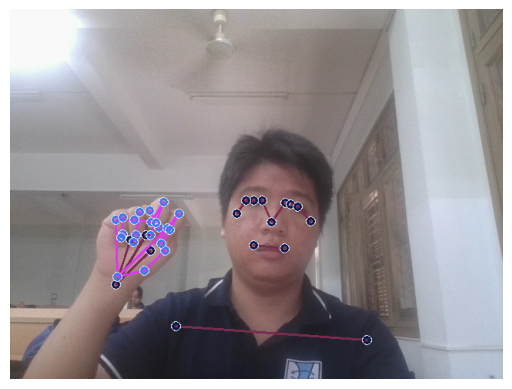

array([ 5.30661404e-01,  5.75476527e-01, -6.93845809e-01,  9.99918699e-01,
        5.58494031e-01,  5.24106860e-01, -6.38456702e-01,  9.99829769e-01,
        5.70137501e-01,  5.28163791e-01, -6.38136983e-01,  9.99742091e-01,
        5.84219575e-01,  5.33798933e-01, -6.38333201e-01,  9.99811947e-01,
        5.12361348e-01,  5.18208981e-01, -6.18415713e-01,  9.99855161e-01,
        4.94788170e-01,  5.17765880e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  